# Preprocessing + Otsu testing using the Dice score algorithm!

**UPDATES**
**Testing (02.06.2022)**

- Dice score around 60-65 % 
- stretching seems not to be working
- first test round complete

**To-Do:**

- optimize preprocessing
- test on whole dataset 



In [91]:
#Packages
%pylab
%matplotlib inline
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from images_segmentation import otsu as ot
from images_segmentation import dicescore as dice 

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "d:\Anaconda\envs\dataanalysis0104_env\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\marie\AppData\Local\Temp\ipykernel_19104\1290861229.py", line 8, in <cell line: 8>
    from images_segmentation import dicescore as dice
  File "c:\Users\marie\Desktop\2022-topic-01-team-04\images_segmentation\dicescore.py", line 60, in <module>
    bice.append(b_dice(i))
  File "c:\Users\marie\Desktop\2022-topic-01-team-04\images_segmentation\dicescore.py", line 8, in b_dice
    gt = ground_truth[x] #gt picture x
NameError: name 'ground_truth' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "d:\Anaconda\envs\dataanalysis0104_env\lib\site-packages\IPython\core\interactiveshell.py", line 1992, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "d:\Anaconda\envs\

In [92]:
#Images
img_1 = imread(r"data\Otsu_data\NIH3T3\img\dna-44.png")
img_2 = imread(r"data\Otsu_data\N2DH-GOWT1\img\t39.tif") 
img_3 = imread(r"data\Otsu_data\N2DL-HeLa\img\t13.tif") 
gt_3 = imread(r"data\Otsu_data\N2DL-HeLa\gt\man_seg13.tif")
gt_1 = imread(r"data\Otsu_data\NIH3T3\gt\44.png")
gt_2 = imread(r"data\Otsu_data\N2DH-GOWT1\gt\man_seg39.tif")

In [108]:
# histogram stretching algorithm
def stretch(x):
    intensities = []
    img = x.copy()
    h = img.shape[0]
    w = img.shape[1]
    for x, y in np.ndindex((h,w)):
        intensities.append(img[x,y])
    img_max = max(intensities)
    img_min = min(intensities)
    for a, b in np.ndindex((h,w)):
        img[a,b] = (img[a,b]-img_min)*256/(img_max-img_min)
    return img 

In [109]:
#Preprocessing
median1 = scipy.ndimage.median_filter(img_1, 11)
gauss1 = scipy.ndimage.gaussian_filter(img_1,9)

median2 = scipy.ndimage.median_filter(img_2, 11)
gauss2 = scipy.ndimage.gaussian_filter(img_2,9)

median3 = scipy.ndimage.median_filter(img_3, 11)
gauss3 = scipy.ndimage.gaussian_filter(img_3,9)

stretch1 = stretch(img_1)
stretch2 = stretch(img_2)
stretch3 = stretch(img_3)


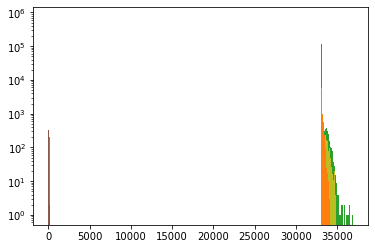

In [112]:
#Otsu
pt1 = ot.otsu_thresholding(img_1,256)
pt2 = ot.otsu_thresholding(img_2,256)
pt3 = ot.otsu_thresholding(img_3,256)

pt4 = ot.otsu_thresholding(stretch1,256)
pt5 = ot.otsu_thresholding(stretch2,256)
pt6 = ot.otsu_thresholding(stretch3,256)

pt8 = ot.otsu_thresholding(median1,256)
pt9 = ot.otsu_thresholding(median2,256)
pt10 = ot.otsu_thresholding(median3,256)

pt11 = ot.otsu_thresholding(gauss1,256)
pt12 = ot.otsu_thresholding(gauss2,256)
pt13 = ot.otsu_thresholding(gauss3,256)

In [114]:
#Dice score

tresholded = [pt11,pt12,pt13]
ground_truth = [gt_1,gt_2,gt_3]
dsc = ['foreground dice ' + str(f_dice(0)), 'background dice ' + str(b_dice(0)),
        'foreground dice ' + str(f_dice(1)), 'background dice ' + str(b_dice(1)),
        'foreground dice ' + str(f_dice(2)), 'background dice ' + str(b_dice(2))]
print(dsc)



['foreground dice 0.5594109014644562', 'background dice 0.8532988402157338', 'foreground dice 0.6573833594179603', 'background dice 0.9795350759772747', 'foreground dice 0.6153487287147189', 'background dice 0.9820688755260267']


**Erste Ergebnisse:**

**Nur Otsu:**  
- 1.Img: 57,58 %  
- 2.Img: 58,30 %   
- 3.Img: 69,61 %   

**Gestretcht:**
- 1.Img: 57,58%  
- 2.Img  58,30%    -> stretcht nicht?   
- 3.Img: 69,61%  

**Median:**
- 1.Img: 56,93 %   
- 2.Img: 59,99 %  
- 3.Img: 66,50 %   

**Gauss:**
- 1.Img: 55,94 %   
- 2.Img: 65,74 %   
- 3.Img: 61,53 %   
